Pregunta 2. Ecuaciones diferenciales parciales - Diferencias Finitas

Ecuación de Laplace,

Nota: Cuando se resuelven eucaciones diferenciales, es importante notar que la unicidad de la solución requiere tener condiciones de frontera (Iniciales), por lo que, no solamente se tomará una ecuación diferencial particular, sino también unas condiciones de frontera.Ecuación de Laplace.

La ecuación de Laplace es una de las ecuaciones diferenciales parciales más conocidas, 
$$
\nabla \phi =0
$$

para solucionarla tomaremos una caja cuadrada, con los bordes conectados a tierra, y dentro, dos placas paralelas más pequeñas a distintos valores de potencial fijo.


In [3]:
import numpy as np   #El tipo de dato
import matplotlib.pylab as plt # Gaficas

Las condiciones iniciales se toman tal que se pone el potencial sobre las placas paralelas

In [4]:
def Initial_conditions(Matrix):
    for i in range(1,N-1):
        for j in range(1,N-1):
            if i==int(N/4) and  j>=N/4 and j<=3*N/4:
                Matrix[i,j]=1
            if i==int(3*N/4) and  j>=N/4 and j<=3*N/4:
                Matrix[i,j]=-1

La solución de estas ecuaciones, se hace a través de una expansión en Taylor para cada potencial, por lo tanto, la expresión que se encuentre va a depender fuertemente del tipo de ecuación, en el caso de la ecuación de Laplace, después de realizar la expansión se encuentra que para cada punto, la solución está dada por el promedio de sus primeras celdas vecinas.

A la hora de programar este problema, es necesario entender un poco cómo funciona este tipo de datos, en lenguajes como `C++` se hace explícito el uso de variables por referencia o por valor, mientras que en `python` no, en este caso, como es una arreglo de numpy se pasa por referencia. 

In [5]:
def Step(Matrix):
    Matrix2=Matrix.copy()
    for i in range(1,N-1):
        for j in range(1,N-1):
            if boundary(i,j):
                Matrix[i,j]=(Matrix2[i-1,j]+Matrix2[i+1,j]+Matrix2[i,j-1]+Matrix2[i,j+1])/4

En este caso, se utilizan las condiciones de frontera deseadas, es importante enfatizar el hecho de que solamente solucionamos la ecuación en regiones donde no hay distribuciones de carga (Ecuación de Laplace), pero al agregar este tipo de condiciones, se está simulando realmente es la ecuación de Poisson, sólo que las distribuciones se agregan como condiciones de frontera.

In [6]:
def boundary(i1,j1):
    if (i1==int(N/4) and  j1>=N/4 and j1<=3*N/4) or (i1==int(3*N/4) and  j1>=N/4 and j1<=3*N/4):
        return False
    else:
        return True

In [7]:
N=50 #Tamano de la matriz en la que se piensa solucionar el problema
Matrix=np.array([[0.0]*N for i in range(N)])

In [8]:
Times=1000
Initial_conditions(Matrix)
for i in range(Times):
    Step(Matrix)

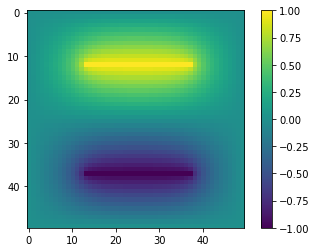

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)
pl=ax.imshow(Matrix)
plt.colorbar(pl)